## Script Contents
### Part 1 of Exercise 10, action 9 continued

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\anon\Documents\CareerFoundry\Data Analytics Immersion\Instacart Basket Analysis'

In [3]:
ords_prods_all = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'cust_depts_merged.pkl'))

### Implementing a simplified grouping of products by price range

In [80]:
# Checking prices distribution

ords_prods_all.agg({'prices': ['min', 'mean', 'max']}).to_clipboard()

In [6]:
# Assigning range groupings

ords_prods_all.loc[ords_prods_all['prices'] <= 5, 'product_price_range'] = 'low price'
ords_prods_all.loc[(ords_prods_all['prices'] > 5) & (ords_prods_all['prices'] < 19), 'product_price_range'] = 'mid price'
ords_prods_all.loc[ords_prods_all['prices'] >= 20, 'product_price_range'] = 'high price'

In [6]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,region,customer_activity,age_group,income_group,department,dependent_type,parental_age,family_type,product_price_range
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,South,high activity,30-39,Working,beverages,no babies in household,older parent,married with dependents,mid price
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,40423,South,high activity,30-39,Working,beverages,no babies in household,older parent,married with dependents,mid price
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,40423,South,high activity,30-39,Working,beverages,no babies in household,older parent,married with dependents,mid price
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,40423,South,high activity,30-39,Working,beverages,no babies in household,older parent,married with dependents,mid price
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,40423,South,high activity,30-39,Working,beverages,no babies in household,older parent,married with dependents,mid price


Text(0.5, 1.0, 'Price Grouping - Counts of Each Group')

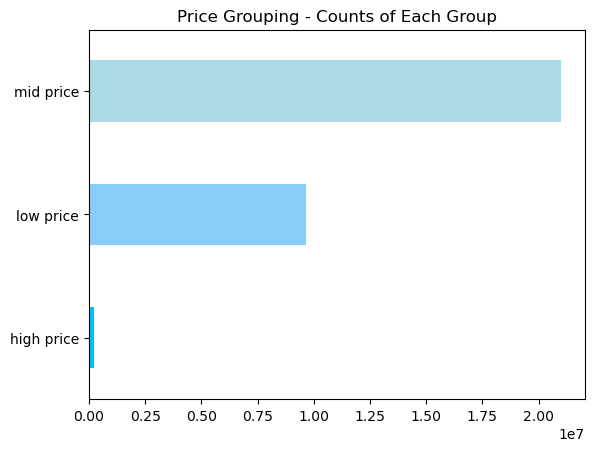

In [9]:
price_range = ords_prods_all['product_price_range'].value_counts().plot.barh(color = ['lightblue', 'lightskyblue', 'deepskyblue'])
plt.gca().invert_yaxis()
plt.title("Price Grouping - Counts of Each Group")

In [10]:
price_range.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'price_range.png'))

In [8]:
# Calculate the percentage of each grouping relative to the total

price_counts = ords_prods_all['product_price_range'].value_counts()
total_rows = len(ords_prods_all)
percentage_of_whole = (price_counts / total_rows) * 100
percentage_of_whole

mid price     67.869872
low price     31.244877
high price     0.717811
Name: product_price_range, dtype: float64

### Which departments have the highest frequency of orders?

Text(0, 0.5, 'Orders')

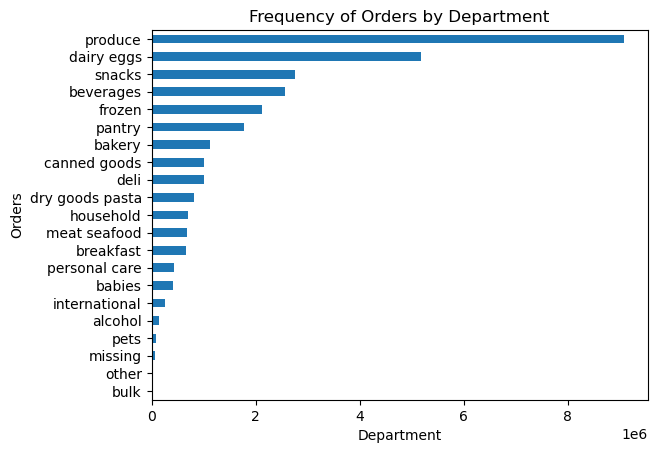

In [35]:
dep_ord_freq = ords_prods_all['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Frequency of Orders by Department")
plt.xlabel("Department")
plt.ylabel("Orders")

In [36]:
dep_ord_freq.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dep_ord_freq.png'))

In [16]:
# Calculate price diferences between produce and dairy eggs departments

produce_freq = ords_prods_all[ords_prods_all['department'] == 'produce']['order_id'].count()
dairy_eggs_freq = ords_prods_all[ords_prods_all['department'] == 'dairy eggs']['order_id'].count()
percent_dif = ((produce_freq - dairy_eggs_freq) / dairy_eggs_freq) * 100

In [17]:
percent_dif

75.37094504307555

In [17]:
# Setting color variable

loyalty_colors = ['darkgreen', 'purple', 'orange']

Text(0, 0.5, 'Count')

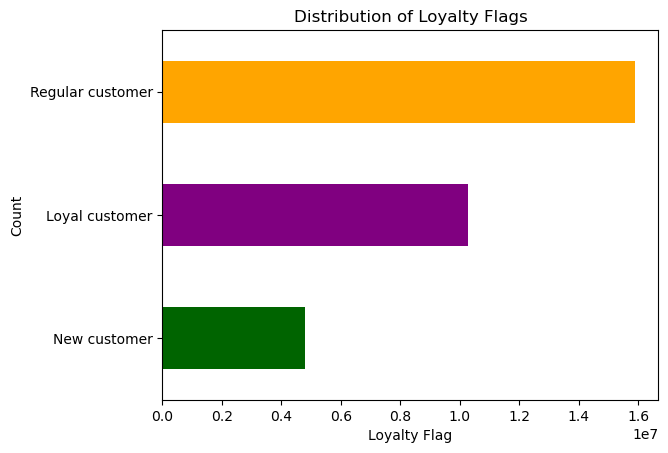

In [18]:
# What's the distribution among users in their brand loyalty?

loyalty_flag_counts = ords_prods_all['loyalty_flag'].value_counts().sort_values(ascending=True).plot.barh(color = loyalty_colors)
plt.title("Distribution of Loyalty Flags")
plt.xlabel("Loyalty Flag")
plt.ylabel("Count")

In [19]:
loyalty_flag_counts.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_flag_counts.png'))

In [18]:
# Calculate the percentage of each grouping relative to the total

loyal_counts = ords_prods_all['loyalty_flag'].value_counts()
total_rows = len(ords_prods_all)
percent_of_whole = (loyal_counts / total_rows) * 100
percent_of_whole

Regular customer    51.274018
Loyal customer      33.212459
New customer        15.513524
Name: loyalty_flag, dtype: float64

Text(0, 0.5, 'Count')

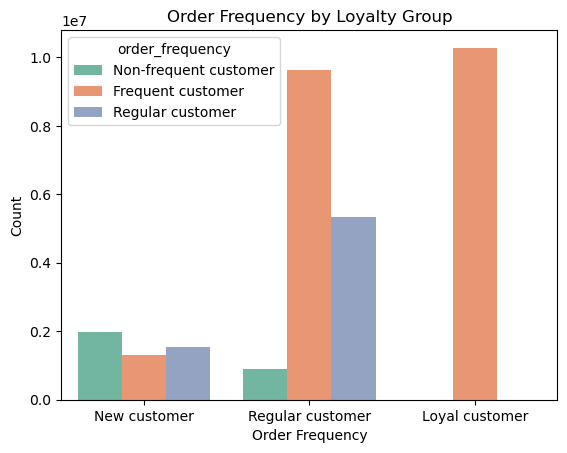

In [9]:
loyalty_freq = sns.countplot(x='loyalty_flag', hue='order_frequency', data=ords_prods_all, palette='Set2')
plt.title('Order Frequency by Loyalty Group')
plt.xlabel('Order Frequency')
plt.ylabel('Count')

In [10]:
loyalty_freq.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_freq.png'))

### What different classifications does the demographic information suggest? Age/income/types of goods/family status

Text(0.5, 1.0, 'Distribution of Babies or No Babies in Household')

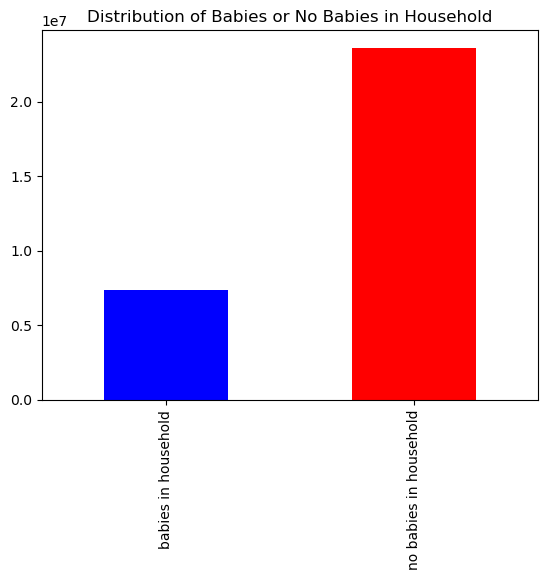

In [7]:
# Vizulizing the distribution of customer classifications (those not vizualized in previous notebooks)

babies_dist = ords_prods_all['dependent_type'].value_counts().sort_index().plot.bar(color = ['blue', 'red'])
plt.title("Distribution of Babies or No Babies in Household")

In [9]:
babies_dist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'babies.png'))

In [28]:
# Calculate the percent difference of 'babies in the household' and 'no babies in the household'
babies_count = ords_prods_all[ords_prods_all['dependent_type'] == 'babies in household']['dependent_type'].count()
no_babies_count = ords_prods_all[ords_prods_all['dependent_type'] == 'no babies in household']['dependent_type'].count()
percentage_difference = ((no_babies_count - babies_count) / babies_count) * 100
percentage_difference

221.04816293141218

In [29]:
babies_count

7354162

In [30]:
no_babies_count

23610402

In [11]:
# Setting color variable

fam_colors = ['violet', 'mediumorchid', 'rebeccapurple', 'indigo']

Text(0.5, 1.0, 'Distribution of Family Status Groups')

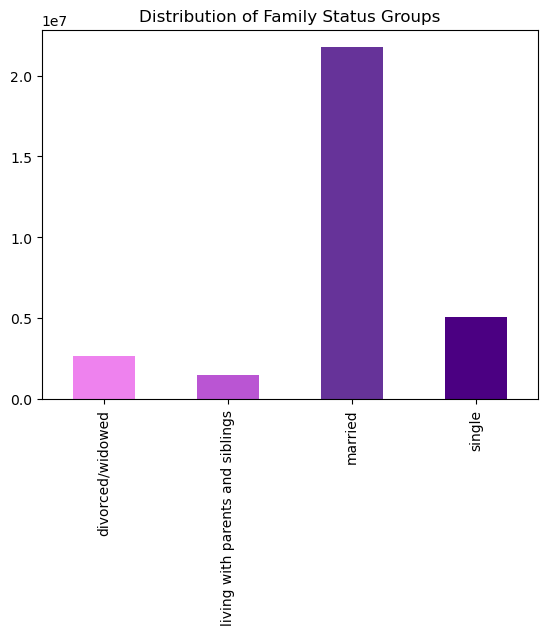

In [16]:
fam_dist = ords_prods_all['fam_status'].value_counts().sort_index().plot.bar(color = fam_colors)
plt.title("Distribution of Family Status Groups")

In [13]:
fam_dist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'fam_dist.png'))

Text(0.5, 1.0, 'Distribution of Family Types')

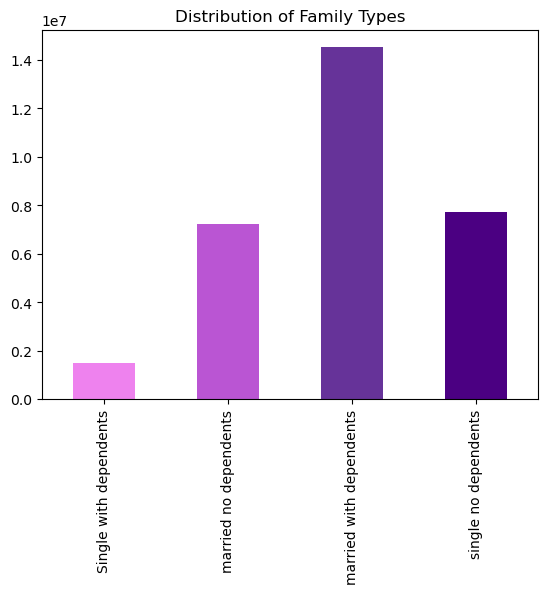

In [14]:
famtype_dist = ords_prods_all['family_type'].value_counts().sort_index().plot.bar(color = fam_colors)
plt.title("Distribution of Family Types")

In [15]:
famtype_dist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'famtype_dist.png'))

Text(0.5, 1.0, 'Distribution of Parental Ages')

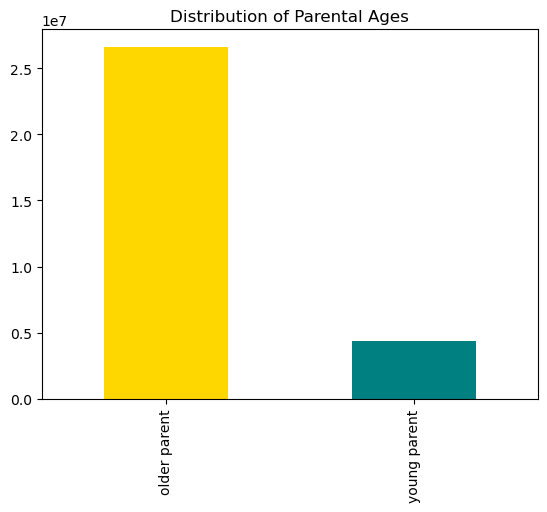

In [18]:
par_age_dist = ords_prods_all['parental_age'].value_counts().sort_index().plot.bar(color = ['gold', 'teal'])
plt.title("Distribution of Parental Ages")

In [19]:
par_age_dist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'par_age_dist.png'))

In [27]:
# Calculate the percent difference of 'older parent' and 'younger parent'
older = ords_prods_all[ords_prods_all['parental_age'] == 'older parent']['parental_age'].count()
younger = ords_prods_all[ords_prods_all['parental_age'] == 'young parent']['parental_age'].count()
percentage_difference2 = ((older - younger) / younger) * 100
percentage_difference2

508.5736907563755

### What differences are there in the ordering habits of different customer profiles? Price of orders/frequency/products ordered

In [4]:
# Setting color variables

age_colors = ['powderblue', 'lightskyblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'navy']
income_colors = ['yellowgreen', 'limegreen', 'forestgreen', 'darkgreen']
fam_colors = ['violet', 'mediumorchid', 'rebeccapurple', 'indigo']

In [11]:
# Price by age

average_prices_by_age = ords_prods_all.groupby('age_group')['average_price'].mean().reset_index()

Text(0, 0.5, 'Average Price')

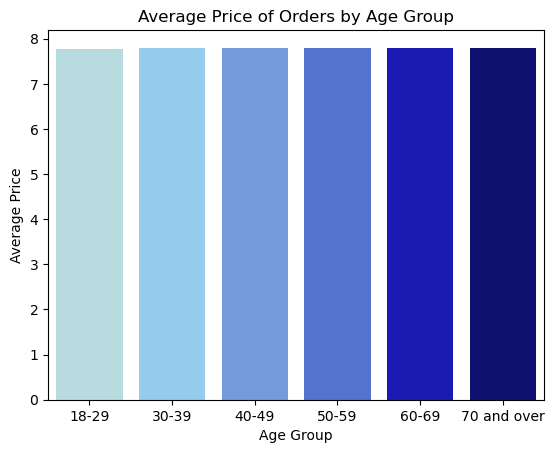

In [12]:
age_price_bar = sns.barplot(data=average_prices_by_age, x='age_group', y='average_price', palette=age_colors)
plt.title("Average Price of Orders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Price")

In [13]:
age_price_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_price_bar.png'))

In [7]:
# Order frequency by age

order_frequency_by_age = ords_prods_all['age_group'].value_counts().reset_index()
order_frequency_by_age.columns = ['age_group', 'order_frequency']

Text(0, 0.5, 'Order Frequency')

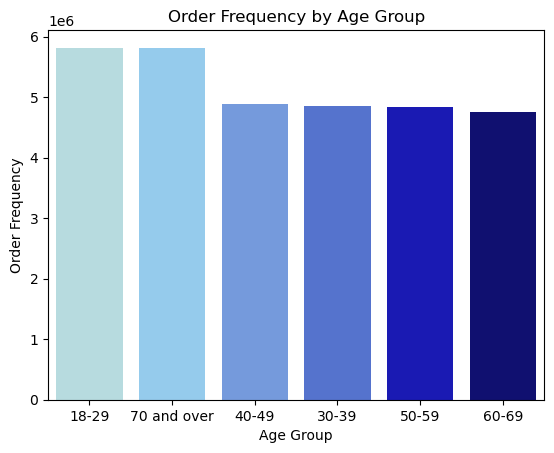

In [8]:
age_freq = sns.barplot(data=order_frequency_by_age, x='age_group', y='order_frequency', palette=age_colors)
plt.title("Order Frequency by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Order Frequency")

In [39]:
age_freq.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_freq.png'))

In [40]:
# Products ordered by age

product_counts_by_age = ords_prods_all.groupby('age_group')['product_id'].count().reset_index()
product_counts_by_age.columns = ['age_group', 'product_count']

Text(0, 0.5, 'Product Count')

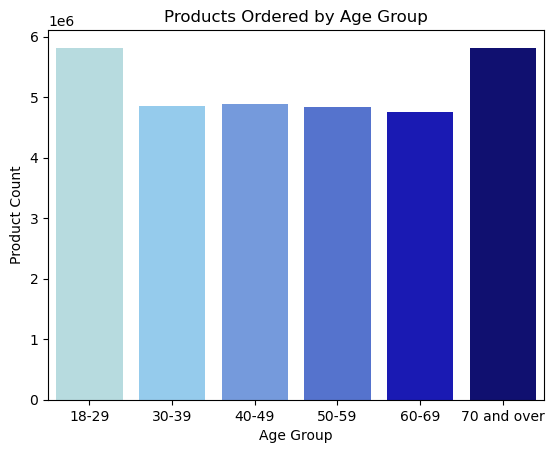

In [42]:
prods_age = sns.barplot(data=product_counts_by_age, x='age_group', y='product_count', palette=age_colors)
plt.title("Products Ordered by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Product Count")

Text(0.5, 0, 'Hour of Day')

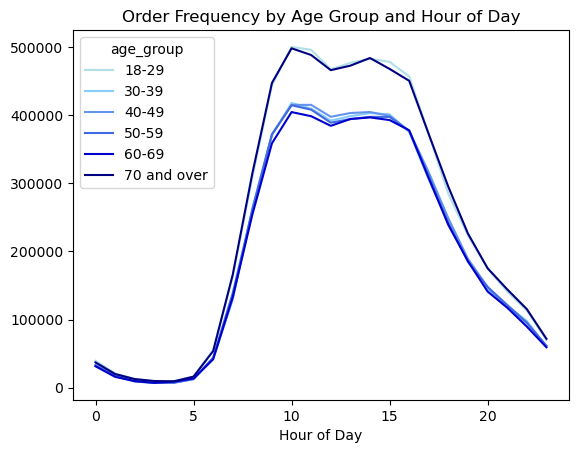

In [33]:
# Order hour of the day by age group

age_hour_of_day = pd.crosstab(ords_prods_all['order_hour_of_day'],ords_prods_all['age_group'],dropna=False)
age_hour_of_day_bar = age_hour_of_day.plot.line(color = age_colors)
plt.title("Order Frequency by Age Group and Hour of Day")
plt.xlabel("Hour of Day")

In [19]:
# Price by income

average_prices_by_income = ords_prods_all.groupby('income_group')['average_price'].mean().reset_index()

Text(0, 0.5, 'Average Price')

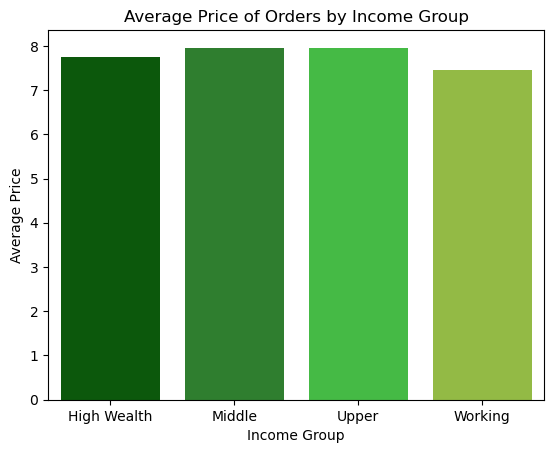

In [20]:
income_price_bar = sns.barplot(data=average_prices_by_income, x='income_group', y='average_price', palette=income_colors[::-1])
plt.title("Average Price of Orders by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Average Price")

In [21]:
income_price_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_price_bar.png'))

In [34]:
# Calculate the average price for 'Middle' customers and 'High Wealth' customers
middle_avg_price = average_prices_by_income[average_prices_by_income['income_group'] == 'Middle']['average_price'].values[0]
high_wealth_avg_price = average_prices_by_income[average_prices_by_income['income_group'] == 'High Wealth']['average_price'].values[0]
price_difference = ((middle_avg_price - high_wealth_avg_price) / high_wealth_avg_price) * 100
price_difference

2.8244751703446513

In [9]:
# Order frequency by income

order_frequency_by_income = ords_prods_all['income_group'].value_counts().reset_index()
order_frequency_by_income.columns = ['income_group', 'order_frequency']

Text(0, 0.5, 'Order Frequency')

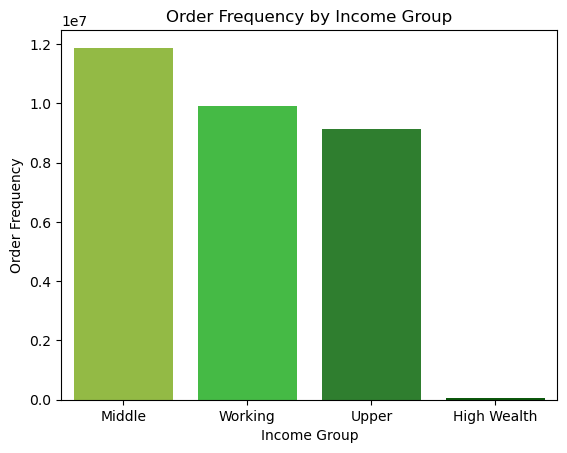

In [12]:
income_freq = sns.barplot(data=order_frequency_by_income, x='income_group', y='order_frequency', palette=income_colors)
plt.title("Order Frequency by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Order Frequency")

In [13]:
income_freq.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_freq.png'))

In [14]:
# Products ordered by income

product_counts_by_income = ords_prods_all.groupby('income_group')['product_id'].count().reset_index()
product_counts_by_income.columns = ['income_group', 'product_count']

Text(0, 0.5, 'Product Count')

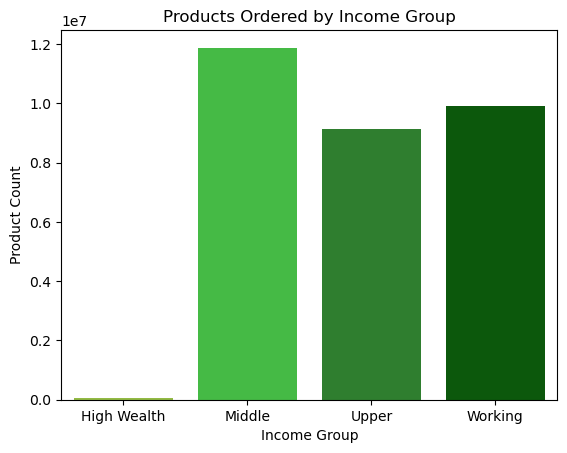

In [16]:
income_prods = sns.barplot(data=product_counts_by_income, x='income_group', y='product_count', palette=income_colors)
plt.title("Products Ordered by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Product Count")

Text(0.5, 0, 'Hour of Day')

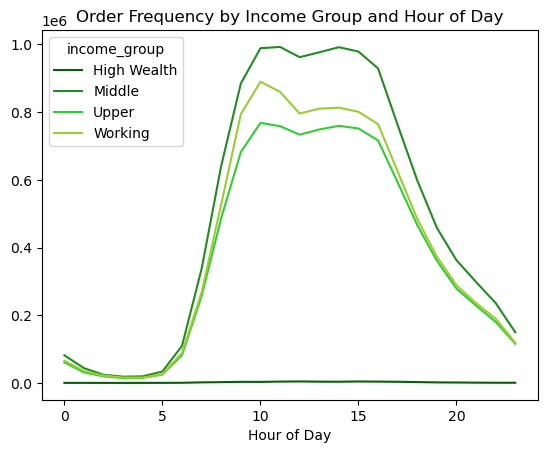

In [16]:
# Order hour of the day by income group

income_hour_of_day = pd.crosstab(ords_prods_all['order_hour_of_day'],ords_prods_all['income_group'],dropna=False)
income_hour_of_day_bar = income_hour_of_day.plot.line(color = income_colors[::-1])
plt.title("Order Frequency by Income Group and Hour of Day")
plt.xlabel("Hour of Day")

In [17]:
income_hour_of_day_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_hour_of_day_bar.png'))

In [17]:
# Price by family status

average_prices_by_fam_status = ords_prods_all.groupby('fam_status')['average_price'].mean().reset_index()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

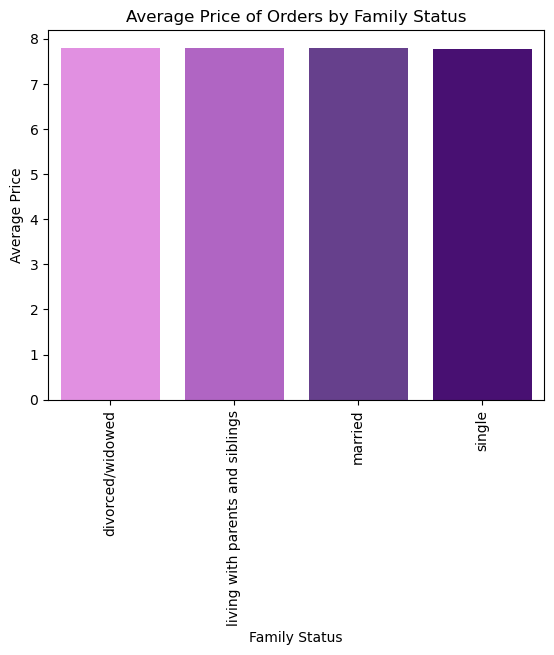

In [22]:
fam_status_price_bar = sns.barplot(data=average_prices_by_fam_status, x='fam_status', y='average_price', palette=fam_colors)
plt.title("Average Price of Orders by Family Status")
plt.xlabel("Family Status")
plt.ylabel("Average Price")
plt.xticks(rotation=90)

In [23]:
fam_status_price_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'fam_status_price_bar.png'))

In [17]:
# Order frequency by family status

order_frequency_by_fams = ords_prods_all['fam_status'].value_counts().reset_index()
order_frequency_by_fams.columns = ['fam_status', 'order_frequency']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'married'),
  Text(1, 0, 'single'),
  Text(2, 0, 'divorced/widowed'),
  Text(3, 0, 'living with parents and siblings')])

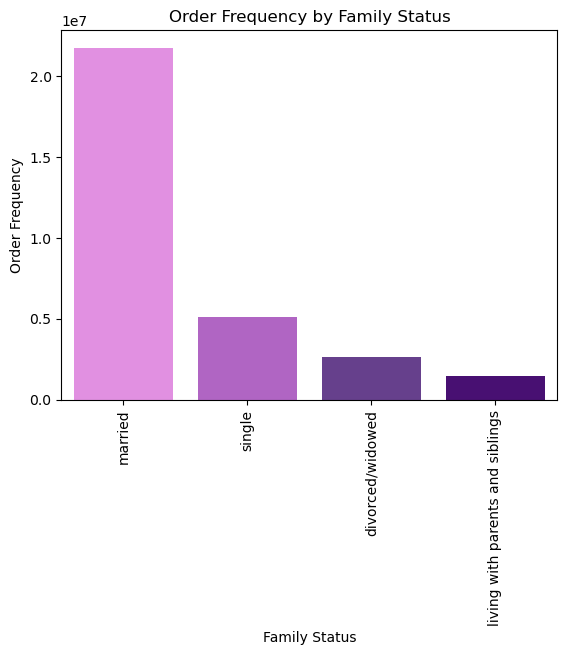

In [20]:
fams_freq = sns.barplot(data=order_frequency_by_fams, x='fam_status', y='order_frequency', palette=fam_colors)
plt.title("Order Frequency by Family Status")
plt.xlabel("Family Status")
plt.ylabel("Order Frequency")
plt.xticks(rotation=90)

In [21]:
# Products ordered by income

product_counts_by_fams = ords_prods_all.groupby('fam_status')['product_id'].count().reset_index()
product_counts_by_fams.columns = ['fam_status', 'product_count']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

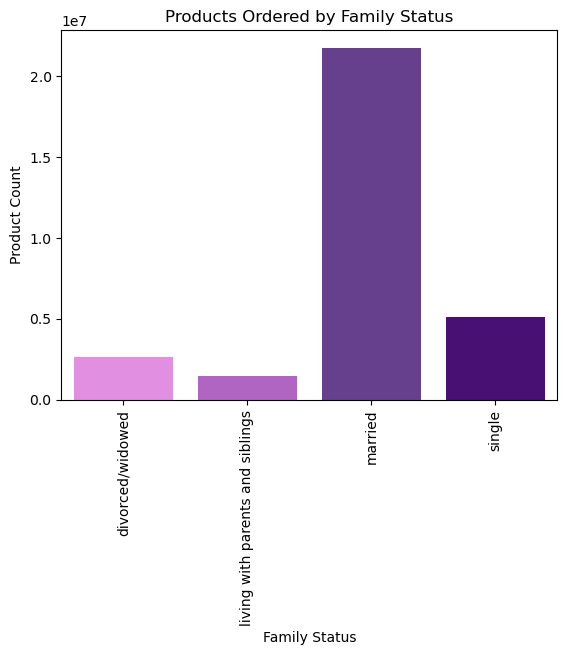

In [23]:
fams_prods = sns.barplot(data=product_counts_by_fams, x='fam_status', y='product_count', palette=fam_colors)
plt.title("Products Ordered by Family Status")
plt.xlabel("Family Status")
plt.ylabel("Product Count")
plt.xticks(rotation=90)

In [24]:
# Price by family types

average_prices_by_fam_type = ords_prods_all.groupby('family_type')['average_price'].mean().reset_index()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single with dependents'),
  Text(1, 0, 'married no dependents'),
  Text(2, 0, 'married with dependents'),
  Text(3, 0, 'single no dependents')])

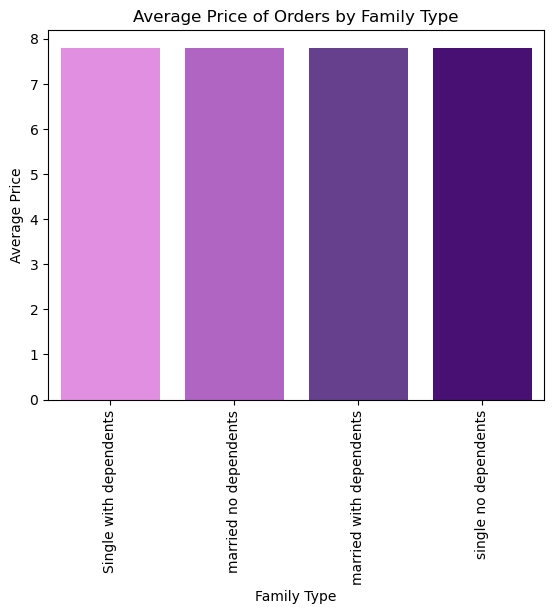

In [25]:
fam_type_price_bar = sns.barplot(data=average_prices_by_fam_type, x='family_type', y='average_price', palette=fam_colors)
plt.title("Average Price of Orders by Family Type")
plt.xlabel("Family Type")
plt.ylabel("Average Price")
plt.xticks(rotation=90)

In [25]:
# Order frequency by family type

order_frequency_by_famt = ords_prods_all['family_type'].value_counts().reset_index()
order_frequency_by_famt.columns = ['family_type', 'order_frequency']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'married with dependents'),
  Text(1, 0, 'single no dependents'),
  Text(2, 0, 'married no dependents'),
  Text(3, 0, 'Single with dependents')])

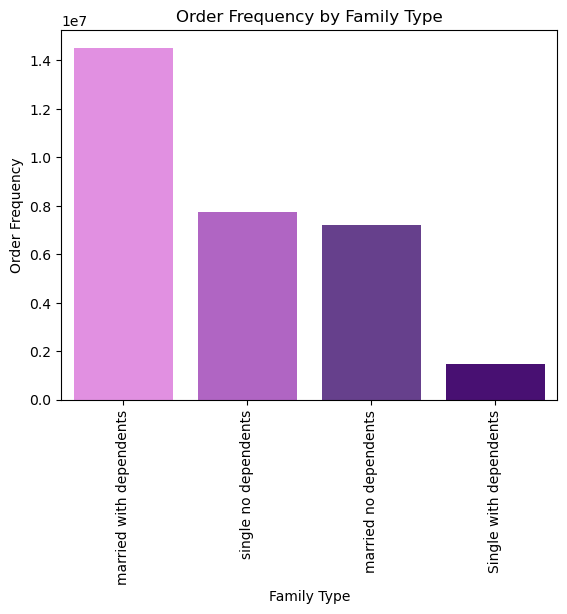

In [26]:
famt_freq = sns.barplot(data=order_frequency_by_famt, x='family_type', y='order_frequency', palette=fam_colors)
plt.title("Order Frequency by Family Type")
plt.xlabel("Family Type")
plt.ylabel("Order Frequency")
plt.xticks(rotation=90)

In [26]:
# Price by dependent type

average_prices_by_dep_type = ords_prods_all.groupby('dependent_type')['average_price'].mean().reset_index()

Text(0.5, 0, 'Hour of Day')

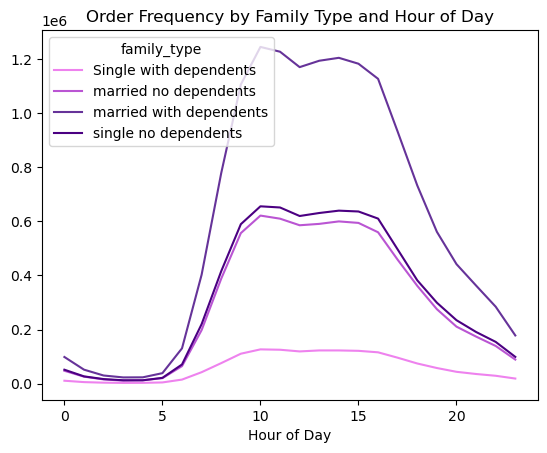

In [13]:
# Order hour of the day by family type

par_age_hour_of_day = pd.crosstab(ords_prods_all['order_hour_of_day'],ords_prods_all['family_type'],dropna=False)
par_age_hour_of_day_bar = par_age_hour_of_day.plot.line(color = fam_colors)
plt.title("Order Frequency by Family Type and Hour of Day")
plt.xlabel("Hour of Day")

(array([0, 1]),
 [Text(0, 0, 'babies in household'), Text(1, 0, 'no babies in household')])

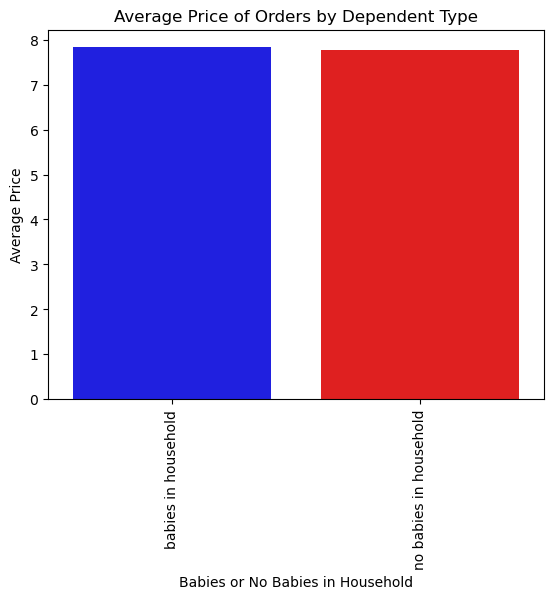

In [34]:
dep_type_price_bar = sns.barplot(data=average_prices_by_dep_type, x='dependent_type', y='average_price', palette=['blue', 'red'])
plt.title("Average Price of Orders by Dependent Type")
plt.xlabel("Babies or No Babies in Household")
plt.ylabel("Average Price")
plt.xticks(rotation=90)

In [35]:
dep_type_price_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dep_type_price_bar.png'))

In [27]:
# Order frequency by dependent type

order_frequency_by_dept = ords_prods_all['dependent_type'].value_counts().reset_index()
order_frequency_by_dept.columns = ['dependent_type', 'order_frequency']

(array([0, 1]),
 [Text(0, 0, 'no babies in household'), Text(1, 0, 'babies in household')])

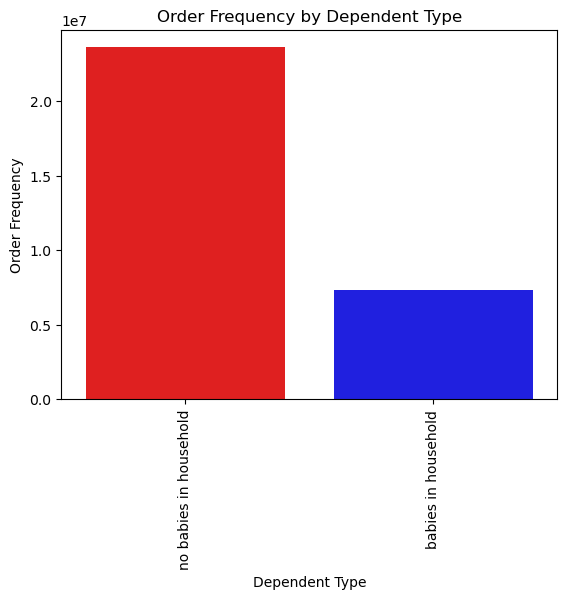

In [30]:
dep_freq = sns.barplot(data=order_frequency_by_dept, x='dependent_type', y='order_frequency', palette=['red', 'blue'])
plt.title("Order Frequency by Dependent Type")
plt.xlabel("Dependent Type")
plt.ylabel("Order Frequency")
plt.xticks(rotation=90)

In [31]:
dep_freq.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dep_freq.png'))

In [32]:
# Products ordered dependent type

product_counts_by_dep = ords_prods_all.groupby('dependent_type')['product_id'].count().reset_index()
product_counts_by_dep.columns = ['dependent_type', 'product_count']

(array([0, 1]),
 [Text(0, 0, 'babies in household'), Text(1, 0, 'no babies in household')])

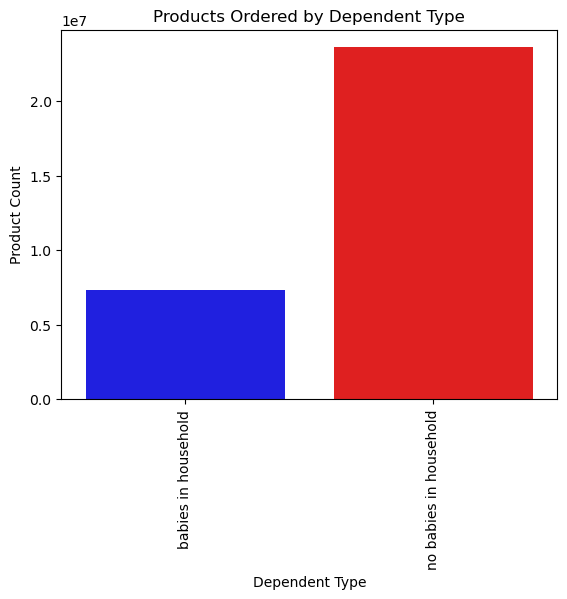

In [34]:
product_counts_by_dep_bar = sns.barplot(data=product_counts_by_dep, x='dependent_type', y='product_count', palette=['blue', 'red'])
plt.title("Products Ordered by Dependent Type")
plt.xlabel("Dependent Type")
plt.ylabel("Product Count")
plt.xticks(rotation=90)

In [35]:
product_counts_by_dep_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'product_counts_by_dep_bar.png'))

Text(0.5, 1.0, 'Department Purchasing by Babies or No Babies')

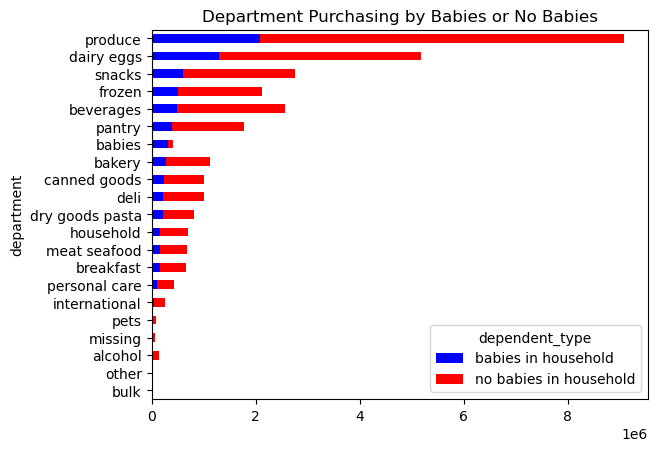

In [37]:
# Department orders by dependent type

dep_by_dep_type = pd.crosstab(ords_prods_all['department'],ords_prods_all['dependent_type'], dropna = False)
dep_by_dep_type_bar = dep_by_dep_type.sort_values(by=['babies in household'], ascending=True).plot.barh(color = ['blue', 'red'], stacked = True)
plt.title("Department Purchasing by Babies or No Babies")

In [38]:
dep_by_dep_type_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dep_by_dep_type_bar.png'))

In [5]:
# Order hour of the day by dependent type

babies_hour_of_day = pd.crosstab(ords_prods_all['order_hour_of_day'],ords_prods_all['dependent_type'],dropna=False)

Text(0.5, 0, 'Hour of Day')

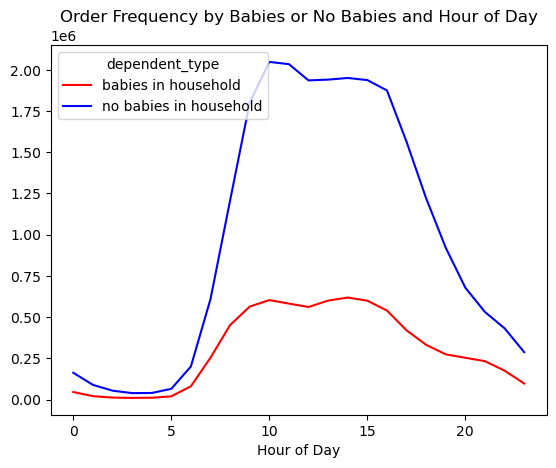

In [7]:
loyalty_hour_of_day_bar = babies_hour_of_day.plot.line(color = ['red', 'blue'])
plt.title("Order Frequency by Babies or No Babies and Hour of Day")
plt.xlabel("Hour of Day")

In [8]:
loyalty_hour_of_day_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_hour_of_day_bar.png'))

Text(0.5, 0, 'Day of Week')

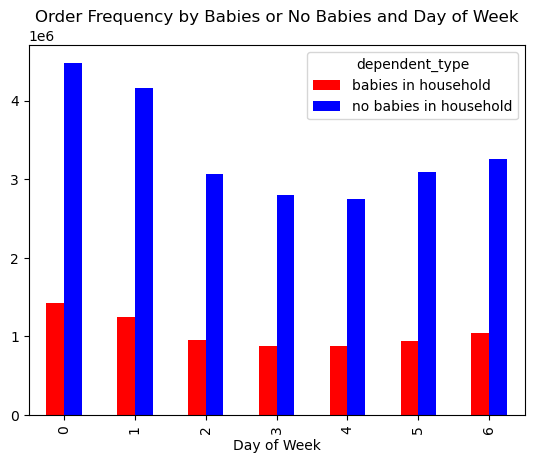

In [10]:
# Order day of weeek by dependent type

babies_dow = pd.crosstab(ords_prods_all['orders_day_of_the_week'],ords_prods_all['dependent_type'],dropna=False)
babies_dow_bar = babies_dow.plot.bar(color = ['red', 'blue'])
plt.title("Order Frequency by Babies or No Babies and Day of Week")
plt.xlabel("Day of Week")

In [30]:
# Price by parental age

average_prices_by_par_age = ords_prods_all.groupby('parental_age')['average_price'].mean().reset_index()

(array([0, 1]), [Text(0, 0, 'older parent'), Text(1, 0, 'young parent')])

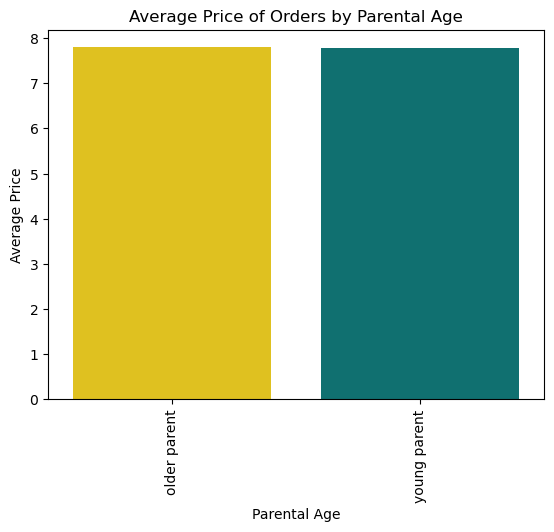

In [33]:
par_age_price_bar = sns.barplot(data=average_prices_by_par_age, x='parental_age', y='average_price', palette=['gold', 'teal'])
plt.title("Average Price of Orders by Parental Age")
plt.xlabel("Parental Age")
plt.ylabel("Average Price")
plt.xticks(rotation=90)

Text(0.5, 0, 'Hour of Day')

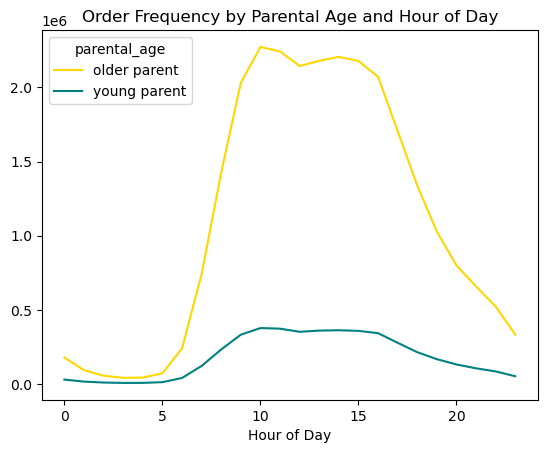

In [31]:
# Order hour of the day by parental age

par_age_hour_of_day = pd.crosstab(ords_prods_all['order_hour_of_day'],ords_prods_all['parental_age'],dropna=False)
par_age_hour_of_day_bar = par_age_hour_of_day.plot.line(color = ['gold', 'teal'])
plt.title("Order Frequency by Parental Age and Hour of Day")
plt.xlabel("Hour of Day")

In [32]:
par_age_hour_of_day_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'par_age_hour_of_day_bar.png'))

In [35]:
# Get the top 5 products for a given group
def top_products(group):
    top_5_products = group['product_name'].value_counts().head(5)
    return top_5_products

In [59]:
top_5_products.head()

NameError: name 'top_5_products' is not defined

In [36]:
# for income

top_products_by_income_group = ords_prods_all.groupby('income_group').apply(top_products)
top_products_by_income_group = top_products_by_income_group.reset_index()
top_products_by_income_group.columns = ['income_group', 'product_name', 'product_count']

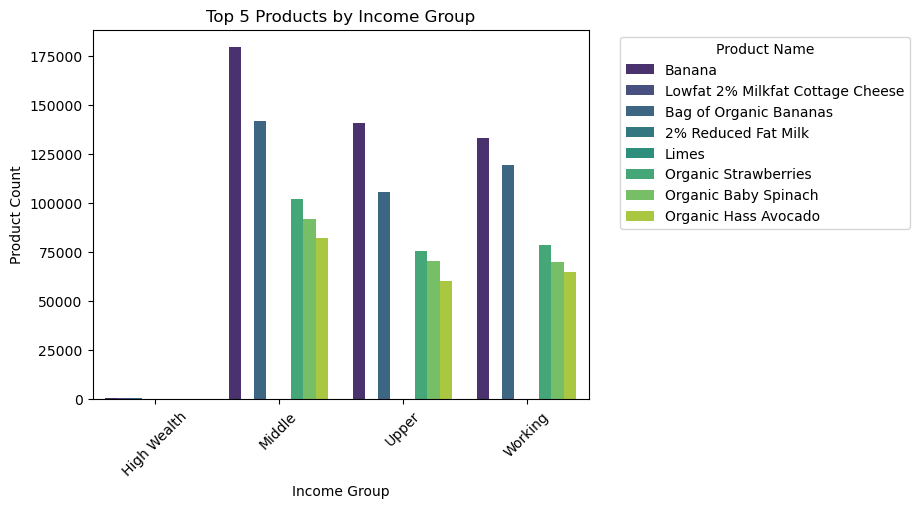

In [45]:
top_by_income = sns.barplot(data=top_products_by_income_group, x='income_group', y='product_count', hue='product_name', palette='viridis')
plt.title("Top 5 Products by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Product Count")
plt.xticks(rotation=45)
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc='upper left')

In [40]:
top_products_by_income_group

,income_group,product_name,product_count
0,High Wealth,Banana,460
1,High Wealth,Lowfat 2% Milkfat Cottage Cheese,404
2,High Wealth,Bag of Organic Bananas,382
3,High Wealth,2% Reduced Fat Milk,264
4,High Wealth,Limes,239
5,Middle,Banana,179261
6,Middle,Bag of Organic Bananas,141442
7,Middle,Organic Strawberries,101745
8,Middle,Organic Baby Spinach,91779
9,Middle,Organic Hass Avocado,81857


In [46]:
top_by_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'top_by_income.png'))

In [52]:
# for age

top_products_by_dep_type = ords_prods_all.groupby('dependent_type').apply(top_products)
top_products_by_dep_type = top_products_by_dep_type.reset_index()
top_products_by_dep_type.columns = ['dependent_type', 'product_name', 'product_count']

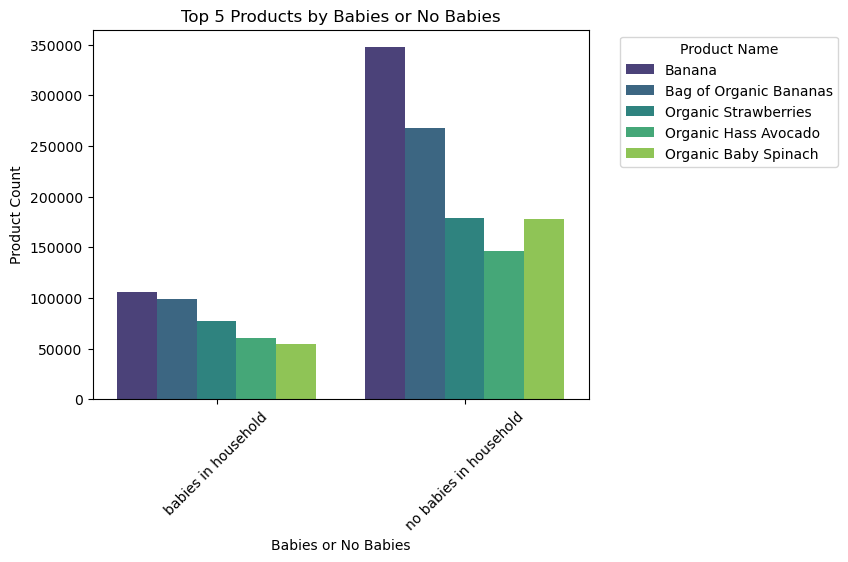

In [53]:
top_products_by_dep_type = sns.barplot(data=top_products_by_dep_type, x='dependent_type', y='product_count', hue='product_name', palette='viridis')
plt.title("Top 5 Products by Babies or No Babies")
plt.xlabel("Babies or No Babies")
plt.ylabel("Product Count")
plt.xticks(rotation=45)
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc='upper left')

In [56]:
top_products_by_dep_type.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'top_products_by_dep_type.png'))

In [63]:
# Check if bananas are also the top product across all age groups

grouped = ords_prods_all.groupby(['age_group', 'department', 'product_name'])['product_id'].count().reset_index(name='product_count')
sorted_df = grouped.sort_values(['age_group', 'product_count'], ascending=[True, False])
top_products_by_age_group = sorted_df.groupby('age_group').head(5)
top_products_by_age_group.reset_index(drop=True, inplace=True)
top_products_by_age_group

      age_group department            product_name  product_count
0         18-29    produce                  Banana          85646
1         18-29    produce  Bag of Organic Bananas          68615
2         18-29    produce    Organic Strawberries          47807
3         18-29    produce    Organic Baby Spinach          43054
4         18-29    produce    Organic Hass Avocado          37724
5         30-39    produce                  Banana          71263
6         30-39    produce  Bag of Organic Bananas          56639
7         30-39    produce    Organic Strawberries          40891
8         30-39    produce    Organic Baby Spinach          36756
9         30-39    produce    Organic Hass Avocado          32725
10        40-49    produce                  Banana          71481
11        40-49    produce  Bag of Organic Bananas          57623
12        40-49    produce    Organic Strawberries          39976
13        40-49    produce    Organic Baby Spinach          37032
14        

In [64]:
# Check the top 5 products order frequency by hour of day

grouped = ords_prods_all.groupby(['order_hour_of_day', 'product_name'])['product_id'].count().reset_index(name='product_count')
sorted_df = grouped.sort_values(['order_hour_of_day', 'product_count'], ascending=[True, False])
top_products_by_hour = sorted_df.groupby('order_hour_of_day').head(5)
top_products_by_hour.reset_index(drop=True, inplace=True)

In [65]:
top_products_by_hour

,order_hour_of_day,product_name,product_count
0,0,Banana,2680
1,0,Bag of Organic Bananas,2618
2,0,Organic Strawberries,1755
3,0,Organic Baby Spinach,1695
4,0,Organic Hass Avocado,1349
...,...,...,...
115,23,Banana,5161
116,23,Bag of Organic Bananas,4748
117,23,Organic Strawberries,3418
118,23,Organic Baby Spinach,3050


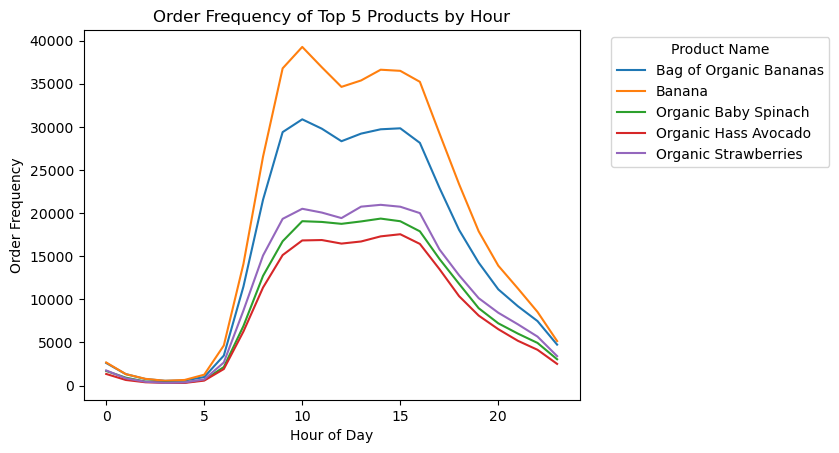

In [70]:
pivot_df = top_products_by_hour.pivot(index='product_name', columns='order_hour_of_day', values='product_count')

for product_name, data in pivot_df.iterrows():
    plt.plot(data.index, data.values, label=product_name)

plt.title("Order Frequency of Top 5 Products by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Order Frequency")
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc='upper left')
fig = plt.gcf()

In [72]:
fig.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'top_products_by_hour_of_day.png'))

In [74]:
# What are the most frequently ordered products at 5am when order prices are high?

hour_5_orders = ords_prods_all[ords_prods_all['order_hour_of_day'] == 5]
top_5_products_at_5 = hour_5_orders['product_name'].value_counts().head(5)
top_5_products_at_5

Banana                    1264
Bag of Organic Bananas     989
Organic Strawberries       717
Organic Baby Spinach       651
Organic Hass Avocado       579
Name: product_name, dtype: int64

In [75]:
top_5_products_at_5.to_clipboard()

In [79]:
# See prices of bananas and organic bananas

product_names = ['Bananas', 'Bag of Organic Bananas']
selected_products = ords_prods_all[ords_prods_all['product_name'].isin(product_names)]
selected_products.set_index('product_name', inplace=True)
prices_of_selected_products = selected_products['prices']
print(prices_of_selected_products)

product_name
Bag of Organic Bananas    10.3
Bag of Organic Bananas    10.3
Bag of Organic Bananas    10.3
Bag of Organic Bananas    10.3
Bag of Organic Bananas    10.3
                          ... 
Bananas                    4.5
Bananas                    4.5
Bananas                    4.5
Bananas                    4.5
Bananas                    4.5
Name: prices, Length: 371030, dtype: float64
